In [1]:
import os

import numpy as np
import pandas
import matplotlib.pyplot as plt

from data.population.utils import filter_by_type, get_indices_matching_type, CityType

In [55]:
# Assumes csv has columns:
# - Country, City, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, Year
# And that the rows are alternatingly celsius and fahrentheit (starting with the former).

def get_temperature_spread(file_path, save=False):
    temperatures = pandas.read_csv(file_path).loc[::2, "City":"Year"] 
    city_labels = temperatures.loc[:, "City"].to_numpy()
    avg_temperatures = temperatures.loc[:, "Year"].to_numpy()    
    max_temperatures = np.max(temperatures.loc[:, "Jan": "Dec"].to_numpy(), axis=1)
    min_temperatures = np.min(temperatures.loc[:, "Jan": "Dec"].to_numpy(), axis=1)
    
    if save:
        cleaned_data = pandas.DataFrame(np.array([avg_temperatures, max_temperatures, min_temperatures]).T, columns=["Avg", "Max", "Min"], index=city_labels)
        cleaned_data.to_csv(f"./cleaned/{os.path.basename(file_path)}")
    
    return city_labels, avg_temperatures, max_temperatures, min_temperatures

def plot_labeled_scatterplot(labels, x, y, title="", xlabel="", ylabel="", fig_kwargs={}):
    fig_kwargs["figsize"] = fig_kwargs.get("figsize", (15,15))
    plt.figure(**fig_kwargs)
    plt.scatter(x, y)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    for i, label in enumerate(labels):
        plt.annotate(label, (x[i], y[i]))
        
    plt.show()
    
def plot_by_city_type(cities, maxs, mins, area):
    # TODO: Make sure I'm not missing cities because of different spellings (/mistakes)
    mega_indices = get_indices_matching_type(cities, CityType.MEGA) 
    large_indices = get_indices_matching_type(cities, CityType.LARGE)
    medium_indices = get_indices_matching_type(cities, CityType.MEDIUM)
    small_indices = get_indices_matching_type(cities, CityType.SMALL)

    plot_list = [
        (mega_indices, "mega"),
        (large_indices, "large"),
        (medium_indices, "medium"),
        (small_indices, "small")
    ]

    for (indices, descriptor) in plot_list:
        
        if indices:
            figlength = max(min(int(len(indices) ** 0.5) * 2, 10), 4)
            
            plot_labeled_scatterplot(
                cities[indices], 
                maxs[indices], 
                mins[indices], 
                title=f"Temperature spread of {descriptor} cities in {area}", 
                xlabel="Maximum monthly average temperature (ºC)", 
                ylabel="Minimum monthly average temperature (ºC)",
                fig_kwargs={"figsize": (figlength, figlength)}
            )
    
    

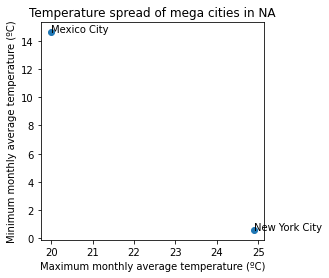

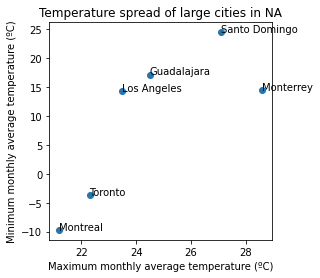

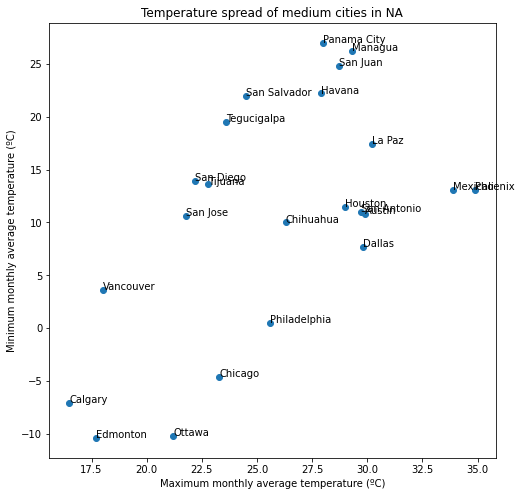

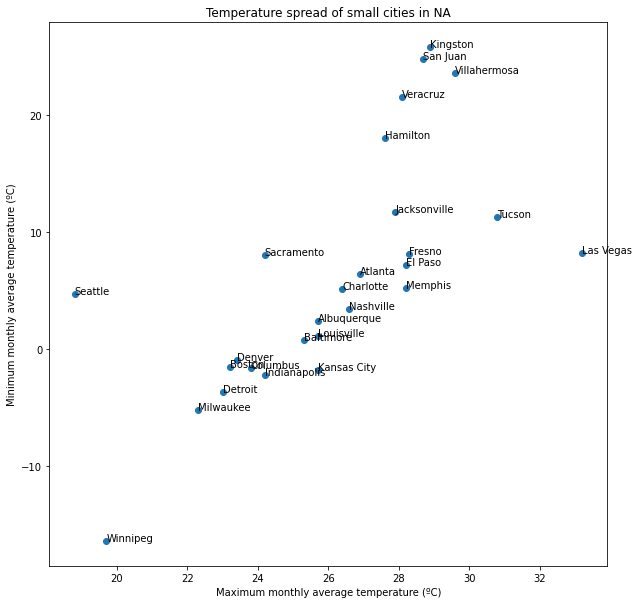

In [56]:
na_cities, na_avgs, na_maxs, na_mins = get_temperature_spread("./raw/north-america.csv")

# There's only one megacity (NY)
plot_by_city_type(na_cities, na_maxs, na_mins, "NA")

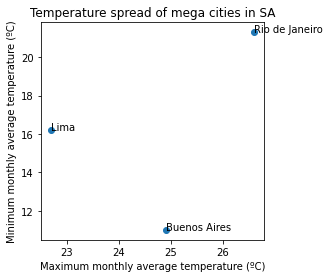

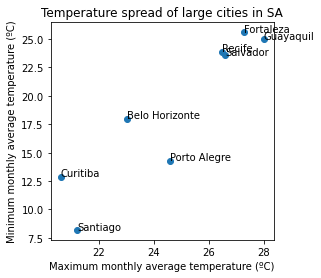

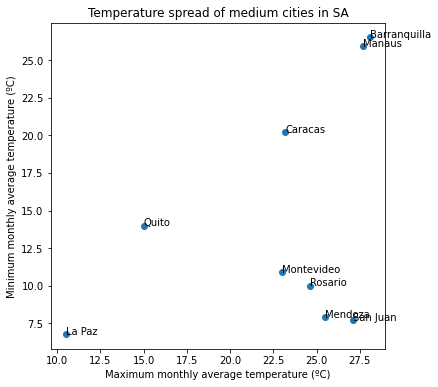

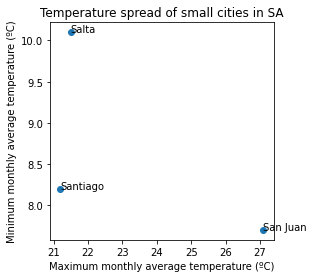

In [57]:
sa_cities, sa_avgs, sa_maxs, sa_mins = get_temperature_spread("./raw/south-america.csv")

plot_by_city_type(
    sa_cities, 
    sa_maxs, 
    sa_mins, 
    "SA"
)

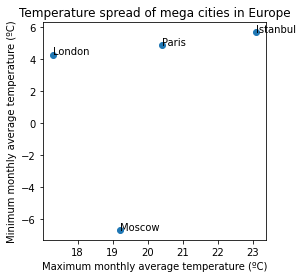

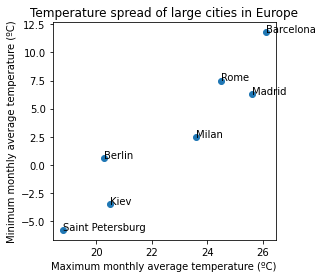

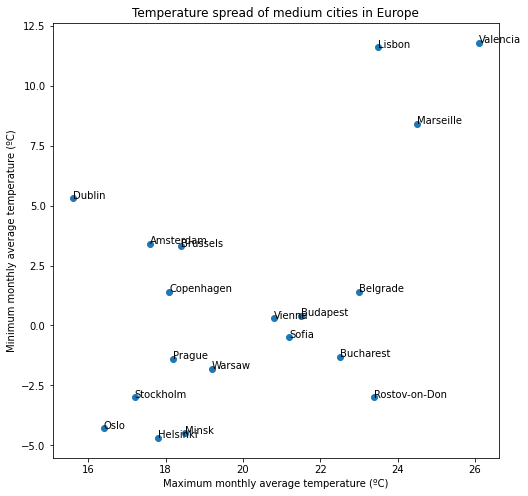

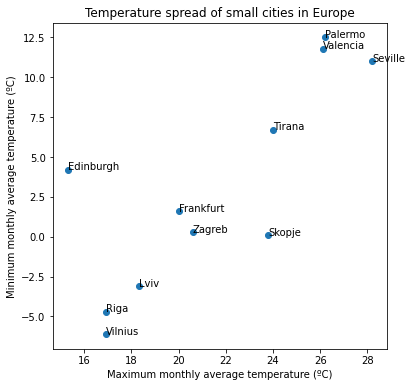

In [58]:
europe_cities, europe_avgs, europe_maxs, europe_mins = get_temperature_spread("./raw/europe.csv")

plot_by_city_type(
    europe_cities, 
    europe_maxs, 
    europe_mins, 
    "Europe"
)

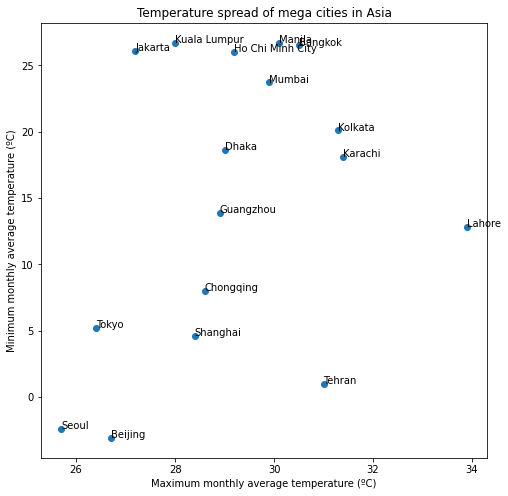

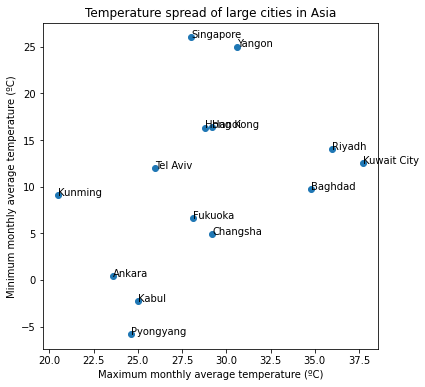

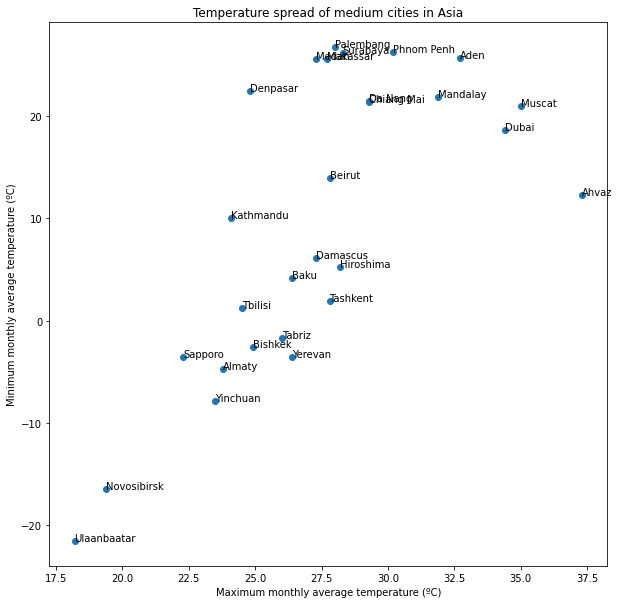

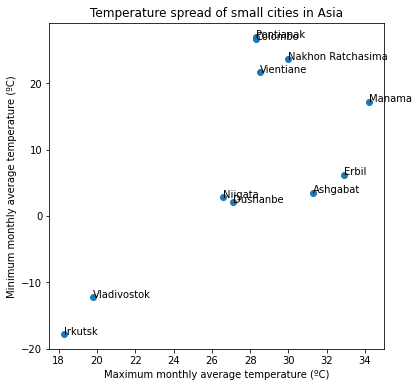

In [59]:
asia_cities, asia_avgs, asia_maxs, asia_mins = get_temperature_spread("./raw/asia.csv")

plot_by_city_type(
    asia_cities, 
    asia_maxs, 
    asia_mins, 
    "Asia"
)

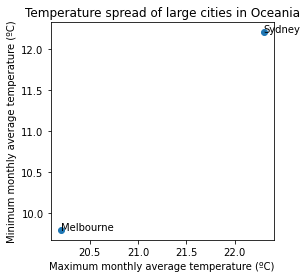

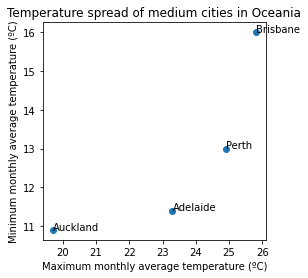

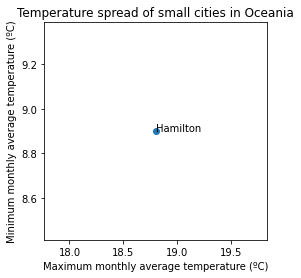

In [61]:
oceania_cities, oceania_avgs, oceania_maxs, oceania_mins = get_temperature_spread("./raw/oceania.csv")

plot_by_city_type(
    oceania_cities, 
    oceania_maxs, 
    oceania_mins, 
    "Oceania"
)